In [90]:
import numpy as np
import pydicom as dicom
import matplotlib.pyplot as plt
from ipywidgets import interact
import json
import scipy.interpolate

In [3]:
import sys
sys.path.insert(0, "../src")


In [4]:
import bdfileutils as bdf

In [6]:
rois = bdf.read_ndarray('E:\\sim4\\1271374\\output_18\\rois_marks_mapped_to_max.nparray')

In [20]:
rois.shape

(165, 179, 261)

In [9]:
@interact(z=(0,doses.shape[0]))
def f(z):
    plt.imshow(doses[z,:,:])

interactive(children=(IntSlider(value=82, description='z', max=165), Output()), _dom_classes=('widget-interact…

In [8]:
doses = bdf.read_ndarray('E:\\sim4\\1271374\\output_18\\doses_to_max.nparray', dtype=np.float32)

In [32]:
doses.shape

(165, 179, 261)

In [63]:
rois_or = bdf.read_ndarray('E:\\sim4\\1271374\\output_18\\rois_marks_original.nparray', dtype=np.int32)

In [115]:
@interact(z=(0,rois.shape[0]), r=(0,64))
def f(z,r):
    d = np.array(rois_or[z,:,:])
    #print(d.dtype)
    d1 = np.bitwise_and(d,  2**r) == 2**r
    dd = np.copy(doses[z,:,:])
    dd[np.logical_not(d1)] = 0
    dv = dd[d1]
    if (dv.shape[0] > 0):
        print(np.min(dv))
        print(np.max(dv))
        print(np.mean(dv))

    plt.imshow(dd)

interactive(children=(IntSlider(value=82, description='z', max=165), IntSlider(value=32, description='r', max=…

In [98]:
a = np.array([[1,2],[3,4]])
np.bitwise_and(a, 2)

array([[0, 2],
       [2, 0]], dtype=int32)

In [99]:
dir(json)

['JSONDecodeError',
 'JSONDecoder',
 'JSONEncoder',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_default_decoder',
 '_default_encoder',
 'codecs',
 'decoder',
 'detect_encoding',
 'dump',
 'dumps',
 'encoder',
 'load',
 'loads',
 'scanner']

In [102]:
with open("E:\\sim4\\1271374\\meta.json") as f:
    meta = json.load(f)
meta

{'from_folder': 'C:\\Users\\szmurlor\\Nextcloud\\Nauka\\BIOTECHMED\\biotechmed\\dane_2020.12\\Grudzien',
 'subfolder_name': '1271374',
 'plan_label': 'PIERS L SO',
 'patient_id': '1271374',
 'piers': True,
 'blizna': False,
 'wezly': False,
 'prawa': False,
 'lewa': True,
 'rois': {'Patient Outline': 1,
  'boost': 2,
  'boost PTV': 3,
  'ctv': 4,
  'naczynia wienc.': 5,
  'piers': 6,
  'piers PTV': 7,
  'ptv': 8,
  'wezly all': 9,
  'wezly all PTV': 10,
  'pluco L': 11,
  'pluco P': 12,
  'serce': 13,
  'suma pluc': 14,
  'piers PTV-plan': 18,
  'przelyk': 54,
  'zz_zdrowa piers': 42,
  'zz_2000': 46,
  'ptv-boost-plan': 26,
  'ptv-piers-plan': 27,
  'zz_zdrowe1': 29,
  'zz_zdrowe2': 31,
  'zz_ptv': 34,
  'zz_obwarz.': 37,
  'zz_boost': 38,
  'zz_ptv rozszerz.': 39,
  '_4500': 40,
  'zz_fluenja': 41,
  'zz_za 1': 44,
  'zz_za 2': 45,
  'zz_4815': 50,
  'zz_sercr': 49,
  'kanal kreg.+5mm': 53,
  'kanal kreg.': 52,
  'gl.kosci ram.': 51,
  'CouchSurface1': 55,
  'CouchInterior1': 56},
 '

In [80]:
def calc_statistics(roi_file, doses_file, roi_bits_file, dtype):
    rois = bdf.read_ndarray(roi_file, dtype=np.int64)
    #doses = bdf.read_ndarray(doses_file, dtype=np.float32)
    doses = bdf.read_ndarray(doses_file, dtype=dtype)
    print(doses)
    roi_bits = {}
    with open(roi_bits_file) as f:
        for line in f:
            cols = line.split(":")
            roi_bits[cols[0]] = int(cols[1])
    
    for k,r in roi_bits.items():
        b = r
        mask = np.bitwise_and(rois,b) == b 
        min = None
        max = None
        avg = None
        d99 = None
        if np.max(mask) > 0:
            the = doses[mask]*upscale
            min = np.min(the)
            max = np.max(the)
            avg = np.mean(the)
            if "ptv" in k.lower():
                vtotal = np.sum(mask)
                print(vtotal)
                print( np.sum( the > (max*0.85) ) /vtotal*100)
                print( np.sum( the > (max*0.97) ) /vtotal*100)
                print( np.sum( the > (max*0.98) ) /vtotal*100)
                print( np.sum( the > (max*0.99) ) /vtotal*100)
        
        if not "zz" in k:
            print(f"{k:>30} [{b:>10}]: min={min:>8.2f}, max={max:>8.2f}, avg={avg:>8.2f}, d99={str(d99):>8}")
    

calc_statistics('E:\\sim4\\1405662\\output_18\\rois_marks_original.nparray', 
                'E:\\sim4\\1405662\\output_18\\doses_to_max.nparray', 
                'E:\\sim4\\1405662\\output\\roi_mapping.txt',
               dtype=np.float32)
calc_statistics('E:\\sim4\\1405662\\output_18\\rois_marks_original.nparray', 
                'E:\\sim4\\1405662\\output_18_eval\\doses_array.nparray', 
                'E:\\sim4\\1405662\\output\\roi_mapping.txt',
               dtype=np.uint8)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
          

In [16]:
rp = dicom.read_file("E:\\sim4\\1055960\\input\dicom\\RP.1.2.246.352.221.49725322121190492443957764962291582634.dcm")

In [40]:
#rp

In [19]:
max_dose = 1157741.0 * 

In [20]:
rd = dicom.read_file("E:\\sim4\\1055960\\input\dicom\\RD.1.2.246.352.221.542089177777351026216379602659443064230.dcm")

In [25]:
rd.DoseGridScaling * max_dose

59.43786391665396

In [29]:
scale  = 18  / (rd.DoseGridScaling * max_dose)

In [32]:
54 * scale

16.353212177392102

In [85]:
#upscale =  (rd.DoseGridScaling * max_dose) / 18
upscale =  (rd.DoseGridScaling * max_dose) / 50

<PIL.PngImagePlugin.PngImageFile image mode=L size=261x179 at 0x165200EE248>


47

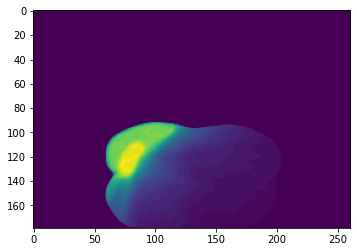

In [81]:
import PIL
pi = PIL.Image.open("E:\\sim4\\1055960\\output_50\\doses_to_max_pil\\pil_im_1055960_75.png")
print(pi)
# = plt.imread("E:\\sim4\\1055960\\output_50\\doses_to_max_pil\\pil_im_1055960_75.png")
plt.imshow(pi)
np.max(pi)

In [129]:
from scipy.interpolate import interp1d
def calc_statistics(roi_file, doses_file, roi_bits_file, dtype):
    rois = bdf.read_ndarray(roi_file, dtype=np.int64)
    #doses = bdf.read_ndarray(doses_file, dtype=np.float32)
    doses = bdf.read_ndarray(doses_file, dtype=dtype)
    roi_bits = {}
    with open(roi_bits_file) as f:
        for line in f:
            cols = line.split(":")
            roi_bits[cols[0]] = int(cols[1])
    
    for k,r in roi_bits.items():
        b = r
        mask = np.bitwise_and(rois,b) == b 
        min = None
        max = None
        avg = None
        d99 = 0
        d98 = 0
        d95 = 0
        if np.max(mask) > 0:
            the = doses[mask]*upscale
            min = np.min(the)
            max = np.max(the)
            avg = np.mean(the)
            if "ptv" in k.lower():
                vtotal = np.sum(mask)
                #print(vtotal)
                p60 = np.sum( the > (54*0.60) ) /vtotal*100
                p70 = np.sum( the > (54*0.70) ) /vtotal*100
                p80 = np.sum( the > (54*0.80) ) /vtotal*100
                p85 = np.sum( the > (54*0.85) ) /vtotal*100
                p88 = np.sum( the > (54*0.88) ) /vtotal*100
                p92 = np.sum( the > (54*0.92) ) /vtotal*100
                p94 = np.sum( the > (54*0.94) ) /vtotal*100
                p99 = np.sum( the > (54*0.99) ) /vtotal*100
                p100 = np.sum( the > (54*1) ) /vtotal*100
                p102 = np.sum( the > (54*1.02) ) /vtotal*100
                p105 = np.sum( the > (54*1.05) ) /vtotal*100
                p110 = np.sum( the > (54*1.1) ) /vtotal*100
                xk = [p60, p70, p80, p85, p88, p92, p94, p99, p100]
                yk = [54*0.60, 54*0.70, 54*0.80, 54*0.85, 54*0.88, 54*0.92, 54*0.94, 54*0.99, 54]
                #print(xk)
                #print(yk)
                cs = interp1d(xk,yk)
                if p60 > 99:
                    d99 = cs( 99)
                    d98 = cs( 98)
                    d95 = cs( 95)
                #fig, ax = plt.subplots(figsize=(6.5, 4))
                #ax.plot(xk, yk, 'o', label='data')
                #print(np.arange(p80,p100-0.01,0.01))
                #ax.plot(np.arange(p80,p100-0.01,0.01), cs(np.arange(p80,p100-0.01,0.01)), label='spline')
                #plt.show()
        
        if not "zz" in k:
            print(f"{k:>30} [{b:>10}]: min={min:>6.2f},max={max:>6.2f},avg={avg:>6.2f},d99={d99:>6.2f},d98={d98:>6.2f},d95={d95:>6.2f}")
    

calc_statistics('E:\\sim4\\1055960\\output_50\\rois_marks_original.nparray', 
                'E:\\sim4\\1055960\\output_50\\doses_to_max.nparray', 
                'E:\\sim4\\1055960\\output\\roi_mapping.txt',
               dtype=np.float32)


               Patient Outline [         1]: min=  0.00,max= 55.87,avg=  8.10,d99=  0.00,d98=  0.00,d95=  0.00
                 wezly all PTV [         2]: min= 30.91,max= 51.12,avg= 44.59,d99= 38.27,d98= 38.79,d95= 40.34
                     wezly all [         4]: min= 42.80,max= 47.55,avg= 44.95,d99=  0.00,d98=  0.00,d95=  0.00
                     piers PTV [         8]: min=  0.00,max= 55.87,avg= 40.84,d99=  0.00,d98=  0.00,d95=  0.00
                         piers [        16]: min= 30.91,max= 55.87,avg= 45.00,d99=  0.00,d98=  0.00,d95=  0.00
                     boost PTV [        32]: min= 46.36,max= 55.87,avg= 53.52,d99= 48.26,d98= 49.03,d95= 50.30
                         boost [        64]: min= 52.31,max= 55.87,avg= 54.34,d99=  0.00,d98=  0.00,d95=  0.00
                     suma pluc [       128]: min=  0.00,max= 54.68,avg= 10.54,d99=  0.00,d98=  0.00,d95=  0.00
                         serce [       256]: min=  1.19,max= 14.27,avg=  3.50,d99=  0.00,d98=  0.00,d95=  0.00
 